In [8]:
# load the required packages
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
%matplotlib inline

In [25]:
data = pd.read_stata(r'../regression analysis/regression_analysis.dta')
data['geometry'] = data['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(data, geometry = data.geometry, crs = 'epsg:4326')
# Convert the unique cities and years into lists for iteration
data['city'] = data['city'].str.capitalize()
cities = data['city'].unique()
cities = [city[0].upper() + city[1:] for city in cities]
city_label = cities
city_label = np.where(city_label == 'Xian', "Xi'an", city_label)
years = sorted(data['year'].unique())
# export to the csv
# sample_data = data.sample(n = 100, random_state = 1)
# sample_data.to_csv('check result.csv', index = False)

In [26]:
data_list = []
dental_number = []
name_list = []
for city in cities:
    for year in years:
        dataframe = data[data['city'] == city]
        dataframe = dataframe[dataframe['year'] == year]
        name = str(city) + " " + str(year)
        data_number = dataframe['kou'].sum()
        dental_number.append(data_number)
        data_list.append(dataframe)
        name_list.append(name)

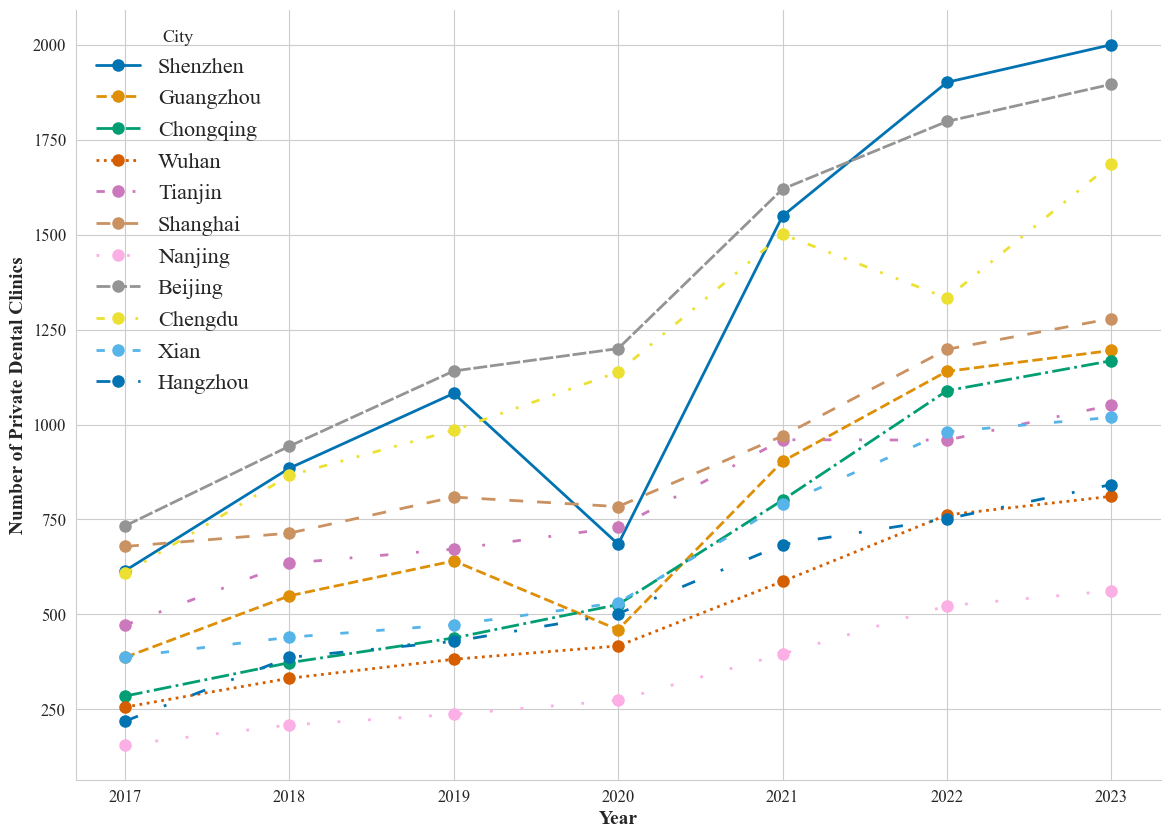

In [27]:
# Set the style of the matplotlib
sns.set_style("whitegrid")  # Use a white grid style for a clean look
plt.rcParams["font.family"] = "Times New Roman"
# Create a color palette
palette = sns.color_palette("colorblind", len(cities))
line_styles = [
    '-',  # solid
    '--',  # dashed
    '-.',  # dash-dot
    ':',   # dotted
    (0, (3, 10, 1, 10)),  # custom: dash, long gap, dot, long gap
    (0, (5, 5)),  # custom: evenly spaced dash
    (0, (1, 10)),  # custom: long gap
    (0, (5, 1)),  # custom: densely dashed
    (0, (3, 5, 1, 5, 1, 5)),  # custom: dash, dot, dash, dot pattern
    (0, (3, 10, 3, 10)),  # custom: long dash, long gap
    (0, (5, 10, 1, 10)),  # custom: dash, long gap, dot
]

# Create a figure object and set the figure facecolor to 'none' for transparency
plt.figure(figsize=(14, 10), facecolor='none')
for i, city in enumerate(cities):
    city_years = [int(year) for name in name_list if city in name for year in name.split() if year.isdigit()]
    city_years = [x+1 for x in city_years]
    city_kou_values = [dental_number[i] for i, name in enumerate(name_list) if city in name]
    plt.plot(city_years, city_kou_values, marker='o',  linestyle=line_styles[i % len(line_styles)], color=palette[i], label=city_label[i], linewidth=2, markersize=8)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Private Dental Clinics', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set legend with a transparent background
plt.legend(fontsize=16, title="City", title_fontsize='13', loc='upper left', frameon=False)

# Set the axes background color to 'none' for transparency
plt.gca().set_facecolor('none')

# Remove the top and right spines
sns.despine()

# Save the figure with high resolution and transparent background
plt.savefig('private_dental_clinics_by_city_and_year.tiff', dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig('private_dental_clinics_by_city_and_year.tiff', bbox_inches='tight', dpi=400)
plt.show()